# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [270]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


# Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

## Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [271]:
# Number of houses in the dataset
total_houses = len(housing_prices)

# Number of features in the dataset
total_features = housing_features.shape[1]

# Minimum housing value in the dataset
minimum_price = np.min(housing_prices)

# Maximum housing value in the dataset
maximum_price = np.max(housing_prices)

# Mean house value of the dataset
mean_price = np.mean(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: **
* ZN: the proportion of residential land in the neighborhood zoned for lots over 25000 sqft. Zoning rules for larger lots are indicative of upper-class residents in the town enforcing the open layout of neighborhoods.
* NOX: the concentration of parts per 10e-7 of NOx pollutants, typically measuring just NO and NO2. This was used as a proxy for generic industrial and transportiation pollution. (Note the website and source disagree on whether this is Nitric Oxide or Nitrogen Oxides, based on the variable name, I would assume it is NOx, not NO, not that it matters for this analysis).
* RM: the average number rooms per residence in the neighborhood.

## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [272]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


* ZN: 0.0
* NOX: 0.659
* RM: 5.609

# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!   
Ensure that you have executed the code block once you are done. You'll know the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [273]:
# Put any import statements you need for this code block here
import numpy.random as npr
import copy

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """
    n_samples = X.shape[0]
    shuffle_inds = np.arange(n_samples)
    npr.shuffle(shuffle_inds)
    
    n_training = int(n_samples * 0.7)
    train_inds = shuffle_inds[:n_training]
    test_inds = shuffle_inds[n_training:]
    
    # Shuffle and split the data
    X_train = X[train_inds]
    y_train = y[train_inds]
    X_test = X[test_inds]
    y_test = y[test_inds]

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


## Question 4
*Why do we split the data into training and testing subsets for our model?*

**Answer: ** After doing all our fitting on the training dataset, we can estimate our results on real-world data by testing our model on the testing dataset. Any tests we do on the testing dataset are biased by the fact that we are fitting using the same dataset, so we could be overfitting the training data, only by evaluating based on an independent testing dataset can we estimate our performance outside of the full test set.

## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [274]:
# Put any import statements you need for this code block here
import sklearn.metrics as skm

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = skm.mean_absolute_error(y_true, y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: **
In the absence of a more fundamental model, I would normally assume a gaussian random process and thus a mean squared error metric, but thinking about housing prices, I actually expect significant outliers based on unmodeled factors. To avoid overweighting the outliers, I chose a mean absolute error metric. 

Intuitively this also agrees with an equal-dollar-weight idea, where I care more about the total value of a portfolio, I am willing to accept a higher residual on a single sample in order to maintain an additively lower residual across the remaining samples.

## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [275]:
# Put any import statements you need for this code block
import sklearn.grid_search as skg

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = skm.make_scorer(performance_metric, greater_is_better=False)

    # Make the GridSearchCV object
    reg = skg.GridSearchCV(regressor, parameters, scoring=scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except Exception as e:
    print(e)
    print "Something went wrong with fitting a model."

Successfully fit a model!


## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: **

GridSearchCV is an exhaustive search algorithm that explicitly iterates over all parameter combinations possible in the specified parameter set and fits a particular model independently at each point in that grid of parameters. It is called grid search because it constructs essentially a grid of the same dimension as the number of parameters it iterates over. It is useful when you have a discrete set of possible parameter values that it is not too costly to iterate over. Any sort of optimization via exhaustive enumeration will eventually become slow as the optimization space grows, but it is fast and easy to optimize problems with small, finite, state spaces this way.

GridSearchCV is special because it performs cross-validation at each grid point.

## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: **

Cross validation breaks a dataset into training and validation subsets. The actual fitting is done on the training subset and the trained model is then tested on the validation subset. This is then repeated k times (for a k-fold cross-validation) with different choices for training and validation sets and the average (or some other metric) of the validation errors is used to score the quality of fit. The default cross-validation choice uses 3-fold cross validation where the test set is divided into 3 subsets, and one is assigned to validation while the other 2 are used for training, resulting in 3 training and 3 evaluations for each training attempt.

By dividing the dataset into a training and validation subset, we can gauge the degree of overfitting at any particular point in the parameter space. As we increase the complexity of our model, we expect to overfit the training data, but because we do not directly fit the cross-validation set, we expect to see rise in the error on the cross-validation set as we increase the complexity of the model. Thus we can pick the point in the grid search at which the cross-validation error is the lowest to find the point where we expect our real-world performance to be best.

Typically, this does not mean we can do away with the test set, since the cross-validation data has now been fit by proxy. We would still need to evaluate our model based on the test set after training on the training data (and filtering based on cross-validation).

Note that after picking parameters using cross-validation, we can use our best parameters and the training data and cross-validation data to train a new model. This should provide a better fit, since we are just adding more data. This is permissible since we will evaluate final accuracy results using a test set, which is independent of both the training and cross-validation sets.

# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [276]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [277]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


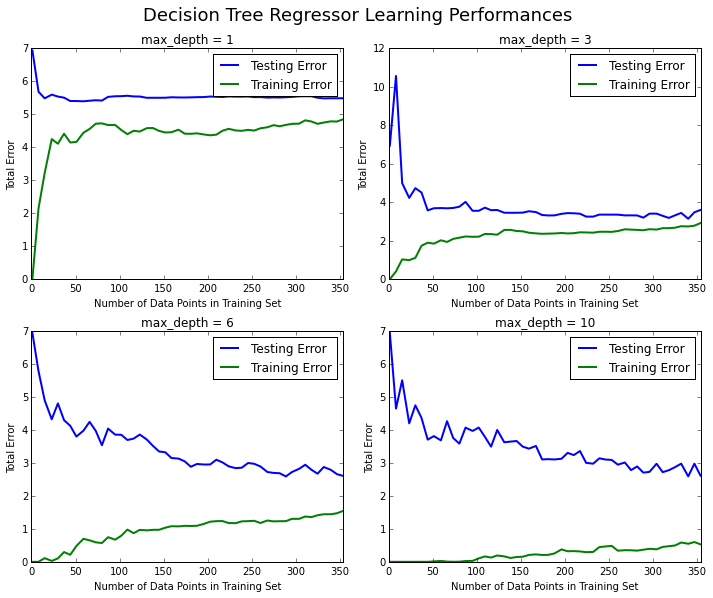

In [278]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: **

Examining max_depth = 6, you can see that as the size of the test set increases, the training error increases. This makes sense since as you include more samples, it becomes harder to fit a model of approximately static complexity.  The testing error, on the other hand, decreases quickly and then plateaus, high above the training error. When the number of sample points is small, each extra sample can improve the overall sample dramatically (or make much worse if it's an outlier), as the number of sample points increases, the model approaches the true function, so the marginal value of each datapoint will decrease.

## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **

* Max depth 1: high bias, the model is too simple to fit most of the data set to reduce the residual error.
* Max depth 10: high variance, the model captures the training set error, but does not generalize well to the test set. It is overfitting the data and is more variable than the data are.

Creating a model complexity graph. . . 


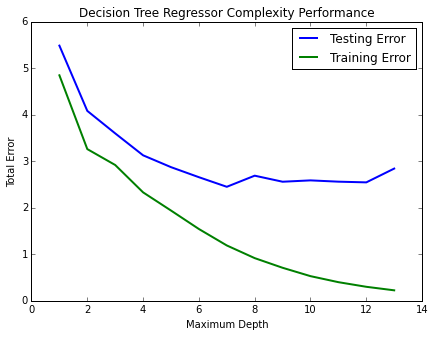

In [279]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **
Max depth = 4.

At max depth = 3 the test and training errors start to diverge significantly, so I would probably try to be careful in validating anything deeper than this. Increasing the max depth to 4 appears to substantially reduce the test set error without a huge divergence between training and test set performance, indicating that the increase in complexity did not result in an unreasonable amount of overfitting. I would pick max depth = 4 as my final parameter choice by intuition alone. Beyond this, the variance in the resulting errors appears to outweigh any benefits from increasing the complexity of the model.

# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

*To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [280]:
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']


Final model has an optimal max_depth parameter of 5


In [281]:
# I did this to simplify getting the max depth over several runs.
# If I don't explicitly fit the model, I obviously don't get variance in my result.
best_depths = []
for i in range(30):
    reg = fit_model(housing_features, housing_prices)
    best_depths.append(reg.get_params()['max_depth'])

print "Final model has an optimal max_depth parameter of", np.median(best_depths)

Final model has an optimal max_depth parameter of 5.0


**Answer: ** The answer appears to converge on a maximum depth of 5. This was consistent, but higher than I anticipated. A max depth of 4 shows a noticeable improvement, but I expected a higher cost due to overfitting at a maximum depth of 5.

## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [282]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 20.968


In [283]:
# I did this to simplify getting the prediction over several runs. The variance
# from fit to fit is fairly small, I just was playing around on this one.
sale_prices = []
for i in range(30):
    reg = fit_model(housing_features, housing_prices)
    sale_price = reg.predict(CLIENT_FEATURES)
    sale_prices.append(sale_price)
print 'Average sale price for client home: {0:.3f}'.format(np.mean(sale_prices))
    

Average sale price for client home: 21.058


**Answer: **

I would predict a sale price around $21,000 based on this model.


This is around the mean of the neighborhood median house prices. The house isn't an outlier in most of the categories (see histograms at the end of the document). In particular, I noted:

* Crime, slightly higher than average.
* Zoning, fewer than average large lots
* Industrial, in the higher peak for industrial density, but not an outlier.
* NOx, upper end of the distribution
* rooms, smaller than the median and mode.
* age, at the higher end, but many homes are.
* dis, among the lowest
* rad, among the highest
* tax, within the largest peak
* ptratio, within the largest peak
* black, just lower than the largest peak value
* lstat, slightly higher than the mode, but lower than the median.

Overall, this appears to be a house near the most probably values for most features, so it makes sense it would be predicted to be around the mean home price.


## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: ** There are a few fundamental weaknesses with these using these data to predict a future client's housing price.

1. These are neighborhood median home prices. These are not actually indicative of individual house prices. If my client has an abnormally sized or featured home for a neighborhood, a pricing algorithm based on these data would not reflect that. Ignoring the remaining points, and assuming these were the best data available, I might use it as a starting point, but I would need to model the effect of my client's outlying features relative to the average house in the neighborhood.
2. The housing prices are from the 1970 US Census. Aside from the fact that 1970 was 46 years ago and the data (particularly pricing and pollution) are out of date, many of the cultural factors like percent black or if the neighborhood is on the Charles may have different effects now compared to 40 years ago.
3. There are much more detailed data now, assuming one can collect data on list prices from zillow, trulia or other generic real-estate listing services like a multiple-listing service. These could let you train a regression model on more detailed features without relying on neighborhood-wide meadians and averages.

In [284]:
print(np.mean(housing_features, axis=0))
print(CLIENT_FEATURES)

[  3.59376071e+00   1.13636364e+01   1.11367787e+01   6.91699605e-02
   5.54695059e-01   6.28463439e+00   6.85749012e+01   3.79504269e+00
   9.54940711e+00   4.08237154e+02   1.84555336e+01   3.56674032e+02
   1.26530632e+01]
[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


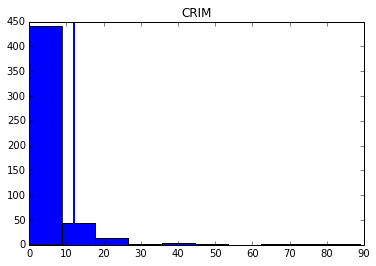

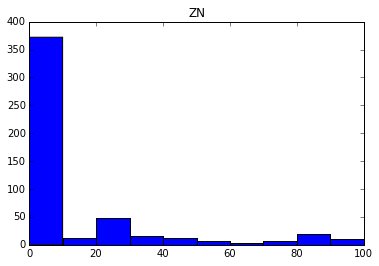

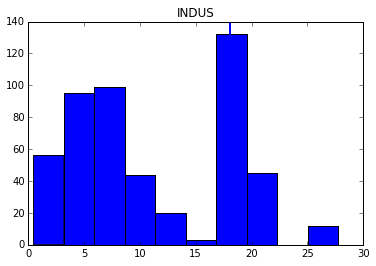

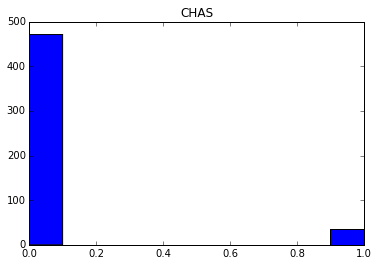

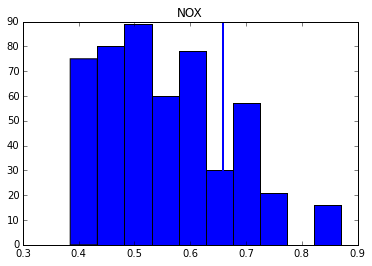

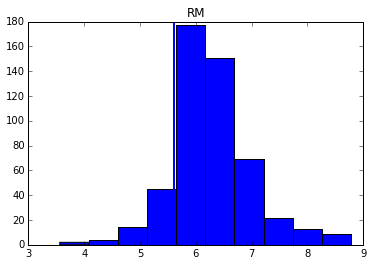

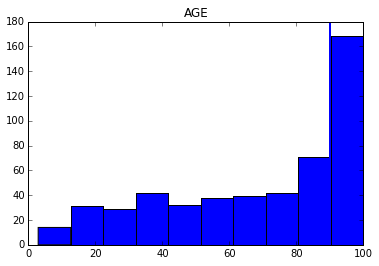

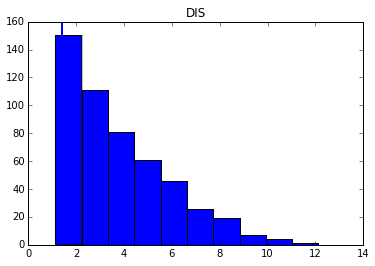

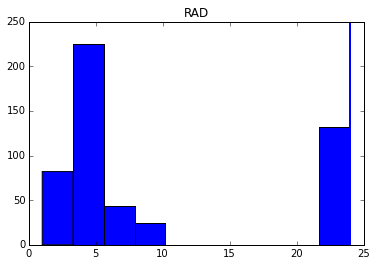

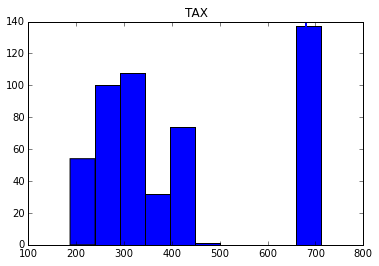

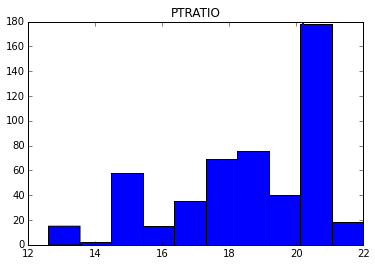

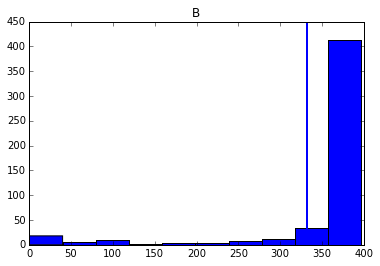

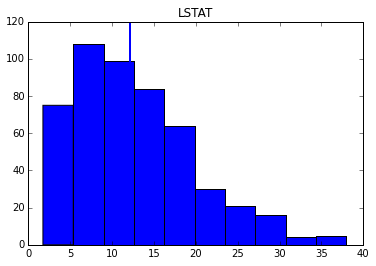

In [285]:
# I used these histograms in question 11 to see if there was anything
# particularly unusual about the client features.
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
for i in range(13):
    f = pl.figure(i)
    ax = f.add_subplot(1, 1, 1)
    ax.set_title(names[i])
    ax.hist(housing_features[:, i])
    ax.axvline(CLIENT_FEATURES[0][i], linewidth=2)